In [ ]:
# Life expectancy at birth indicates the number of years a newborn infant would live if 
# prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

In [1]:
#Dependencies

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy import stats

In [56]:
#Import csv file - Life Expectancy.  This is for all countries 2000-2015
# https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1

#Import csv file - Life Expectancy since 1970 (44 countries)
csv_path = "Resources/Life_Expectancy.csv"
csv_path_2 = "Resources/GDP_1970_to_2018.csv"
csv_path_3 = "Resources/Life_1970.csv"

life_exp = pd.read_csv(csv_path)
gdp_data = pd.read_csv(csv_path_2)
life_exp_1970 = pd.read_csv(csv_path_3)


In [10]:
#clean-up csv

reduced_life = life_exp[["Country","Year","Status","Life expectancy "]]
cleaned_life = reduced_life.rename(columns={"Life expectancy ":"Life Expectancy", "Country":"Country Name"})
cleaned_life.head()

,Country Name,Year,Status,Life Expectancy
0,Afghanistan,2015,Developing,65.0
1,Afghanistan,2014,Developing,59.9
2,Afghanistan,2013,Developing,59.9
3,Afghanistan,2012,Developing,59.5
4,Afghanistan,2011,Developing,59.2


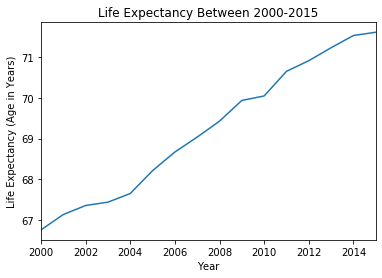

In [13]:
##life expectancy over time 2000-2015 with all countries

cleaned_life.groupby('Year')['Life Expectancy'].mean().plot(kind='line')
plt.title("Life Expectancy Between 2000-2015")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Age in Years)")

#plt.savefig("LifeExp_overtime.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

In [35]:
#Get mean life expectancy for all countries

cleaned_life.groupby(["Year"]).mean()

,Life Expectancy
Year,
2000,66.750273
2001,67.128962
2002,67.351366
2003,67.433333
2004,67.646448
2005,68.209290
2006,68.667760
2007,69.036066
2008,69.427869


In [70]:
#Add GDP mean

gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df.dropna()
gdp_summary_df.head()

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,128.0,2.192235,9.996986,0.001430,0.032350,0.155630,0.899435,107.3303
1,1971,129.0,2.404500,10.862506,0.001528,0.036280,0.168522,0.918177,116.4850
2,1972,129.0,2.774642,12.106388,0.001894,0.041067,0.196873,0.966416,127.9110
3,1973,129.0,3.384634,13.849898,0.002420,0.052355,0.246549,1.384189,142.5376
4,1974,130.0,3.872147,15.033413,0.003151,0.057039,0.294950,1.630835,154.5243


In [41]:
#Update life expectancy file so that Year is not an index and is able to merge with GDP file

new_life = cleaned_life.groupby(["Year"]).mean()
new_life.reset_index(level=0, inplace=True)
new_life.head()


,Year,Life Expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448


In [44]:
#Update gdp summary file so that the Year column is integer and can merge with life expectancy

gdp_summary_df['Year']=gdp_summary_df['Year'].astype(int)

In [45]:
#Merge life expectancy and gdp file by year

life_gdp_merge = pd.merge(new_life, gdp_summary_df, on='Year')
life_gdp_merge.head()

,Year,Life Expectancy,count,mean,std,min,25%,50%,75%,max
0,2000,66.750273,198.0,16.762140,83.755230,0.001374,0.173945,0.819837,5.318316,1025.234546
1,2001,67.128962,198.0,16.678424,84.315397,0.001320,0.168335,0.821834,5.396157,1058.182140
2,2002,67.351366,203.0,16.897966,85.626187,0.001545,0.182472,0.777508,5.576783,1093.641905
3,2003,67.433333,203.0,18.972229,91.202597,0.001823,0.232230,0.868323,6.401254,1145.824388
4,2004,67.646448,204.0,21.287228,98.138471,0.002153,0.280929,1.023246,7.594080,1221.372915


The r-squared is: 0.9862126146288583


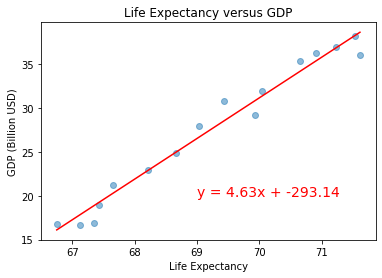

In [50]:
#Graph average life expectancy over time versus average gdp
x_values = life_gdp_merge['Life Expectancy']
y_values = life_gdp_merge['mean']
y_values = y_values.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(69,20),fontsize=14,color="red")
plt.title("Life Expectancy versus GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP (Billion USD)")
print(f"The r-squared is: {rvalue}")

#plt.savefig("LifeExp_vs_GDP.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

In [53]:
#Optional add (for fun)

age = 90
print(f"On average, for the life expectancy of {age} years old, the country GDP would have to be {round(slope * age + intercept,2)} billion USD.")
age2 = 100
print(f"On average, for the life expectancy of {age2} years old, the country GDP would have to be {round(slope * age2 + intercept,2)}. billion USD")

On average, for the life expectancy of 90 years old, the country GDP would have to be 123.82 billion USD.
On average, for the life expectancy of 100 years old, the country GDP would have to be 170.15. billion USD


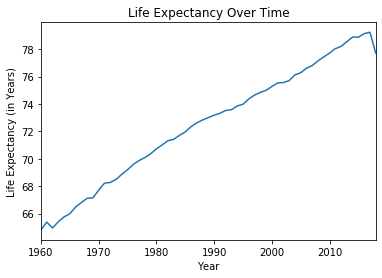

In [61]:
#Life Expectancy over time for 44 countries listed in life exp file from 1970-2017.

life_exp_1970.groupby('TIME')['Value'].mean().plot(kind='line')
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in Years)")

#plt.savefig("LifeExp_all.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

In [59]:
#Read in life expectancy from 1970 file.  File only contains 44 countries, so pulling to help show
#USA trend

usa_1970 = life_exp_1970.loc[life_exp_1970['LOCATION'] =='USA']
usa_1970.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4719,USA,LIFEEXP,MEN,YR,A,1960,66.6,NaN
4720,USA,LIFEEXP,MEN,YR,A,1961,67.1,NaN
4721,USA,LIFEEXP,MEN,YR,A,1962,66.9,NaN
4722,USA,LIFEEXP,MEN,YR,A,1963,66.6,NaN
4723,USA,LIFEEXP,MEN,YR,A,1964,66.8,NaN


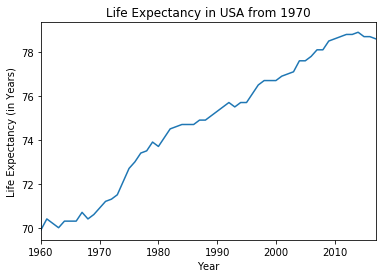

In [63]:
#life expectancy over time for both men and women in USA 1970-2017

total_1970 = usa_1970.loc[usa_1970['SUBJECT'] =='TOT']

total_1970.plot(x="TIME", y="Value", kind='line', legend=False)
plt.title("Life Expectancy in USA from 1970")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in Years)")
#plt.savefig("LifeExp_USA.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

In [68]:
#Filter out for the year 2000 on the life exp file 2000-2015

year_2000 = cleaned_life.loc[life_exp['Year'] ==2000]
year_2000.head()

,Country Name,Year,Status,Life Expectancy
15,Afghanistan,2000,Developing,54.8
31,Albania,2000,Developing,72.6
47,Algeria,2000,Developing,71.3
63,Angola,2000,Developing,45.3
79,Antigua and Barbuda,2000,Developing,73.6


In [73]:
#Merge life expectancy for the year 2000 and gdp data

merge_2000_gdp = pd.merge(year_2000, gdp_data, on='Country Name')
merge_2000_gdp


,Country Name,Year,Status,Life Expectancy,Country Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,2000,Developing,54.8,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,...,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN
1,Albania,2000,Developing,72.6,ALB,NaN,NaN,NaN,NaN,NaN,...,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN
2,Algeria,2000,Developing,71.3,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,...,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN
3,Angola,2000,Developing,45.3,AGO,NaN,NaN,NaN,NaN,NaN,...,8.379950,11.178969,12.805285,13.670986,14.571220,11.619365,10.112385,12.212382,10.575099,NaN
4,Antigua and Barbuda,2000,Developing,73.6,ATG,NaN,NaN,NaN,NaN,NaN,...,0.114870,0.113764,0.119995,0.118145,0.124973,0.133669,0.143659,0.146798,0.161057,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Uruguay,2000,Developing,75.1,URY,0.213710,0.280726,0.218942,0.396430,0.409021,...,4.028448,4.796244,5.126439,5.753123,5.723601,5.327430,5.268761,5.648899,5.959689,NaN
153,Uzbekistan,2000,Developing,67.1,UZB,NaN,NaN,NaN,NaN,NaN,...,4.667988,5.651628,6.362885,6.899717,7.665854,8.184741,8.177901,5.915995,5.049992,NaN
154,Vanuatu,2000,Developing,69.0,VUT,NaN,NaN,NaN,NaN,NaN,...,0.070080,0.079215,0.078170,0.080179,0.081495,0.075969,0.080433,0.088004,0.091430,NaN
155,Zambia,2000,Developing,43.8,ZMB,0.182529,0.168700,0.191071,0.226871,0.312183,...,2.026556,2.346010,2.550337,2.804546,2.715063,2.124335,2.095475,2.586814,2.672007,NaN


In [76]:
#Filtering out USA and Japan since GDP are outliers

merge_2000_gdp = merge_2000_gdp[merge_2000_gdp['Country Name'] != 'United States of America']
merge_2000_gdp = merge_2000_gdp[merge_2000_gdp['Country Name'] != 'Japan']

The r-squared is: 0.3091291700831445
Slope is: 0.7637105384660227


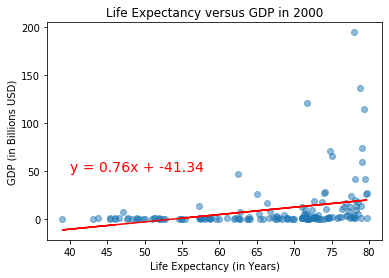

In [77]:
#Life expectancy versus GDP in 2000

x_values = merge_2000_gdp['Life Expectancy']
y_values = merge_2000_gdp['2000']
y_values = y_values.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=14,color="red")
plt.title("Life Expectancy versus GDP in 2000")
plt.xlabel("Life Expectancy (in Years)")
plt.ylabel("GDP (in Billions USD)")
print(f"The r-squared is: {rvalue}")

print(f"Slope is: {slope}")

#plt.savefig("LifeExp_vs_GDP_2000.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()